# Non-Metrical filtrations 
(or any type of hand-made filtration)

In [5]:
import dionysus as dio 
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt
import networkx as nx 

## Simplices

In [6]:
s = dio.Simplex([0,1,2])
print("Dimension:", s.dimension())

Dimension: 2


In [7]:
for sb in s.boundary():
     print(sb)

for v in s:
    print(v)
    
s.data = 5
print(s)

<1,2> 0
<0,2> 0
<0,1> 0
0
1
2
<0,1,2> 5


In [8]:
simplex4 = dio.Simplex([0,1,2,3])
sphere4  = dio.closure([simplex4], 4)
print(sphere4)

[<0,2,3> 0, <0,1,3> 0, <0,2> 0, <0,1> 0, <1,3> 0, <0,3> 0, <1,2> 0, <2,3> 0, <1,2,3> 0, <0,1,2,3> 0, <0> 0, <1> 0, <2> 0, <3> 0, <0,1,2> 0]


## Filtration: super simple case

In [9]:
simplices = [([2], 4), ([1,2], 5), ([0,2], 6), 
             ([0], 1),   ([1], 2), ([0,1], 3)]
f = dio.Filtration()

In [10]:
for vertices, time in simplices:
     f.append(dio.Simplex(vertices, time))
f.sort()
for s in f:
    print(s)

<0> 1
<1> 2
<0,1> 3
<2> 4
<1,2> 5
<0,2> 6


<img src = "imgs/filtration.png">



In [11]:
m = dio.homology_persistence(f)

In [12]:
dgms = dio.init_diagrams(m, f)
print(dgms)

[Diagram with 3 points, Diagram with 1 points]


In [13]:
for i, dgm in enumerate(dgms):
    for pt in dgm:
        print(i, pt.birth, pt.death)

0 1.0 inf
0 2.0 3.0
0 4.0 5.0
1 6.0 inf


## Filtration: slightly more complex case

In [14]:
points = np.random.random((100, 2))
f = dio.fill_rips(points, 2, 1.)
p = dio.homology_persistence(f)
dgms = dio.init_diagrams(p, f)

/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


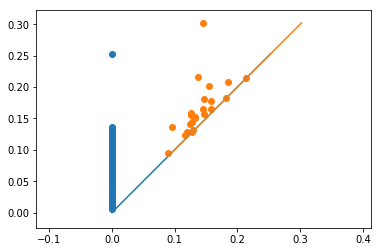

In [15]:
dio.plot.plot_diagram(dgms[0]);
dio.plot.plot_diagram(dgms[1]);

## Filtration: non-metrical case

In [16]:
g = nx.read_weighted_edgelist('../data/wnets/celegans_weighted_undirected.edges',nodetype=int)

In [17]:
def weight_based_filtration(g, min_weight=None):
    import networkx as nx 
    import dionysus as dio
    w = nx.get_edge_attributes(g,'weight');
    ww = [(k, w[k]) for k in sorted(w, key=w.get, reverse=True)]
    if min_weight==None:
        min_weight = ww[-1][1];
    gg = nx.Graph();
    gg.add_nodes_from(g.nodes());
    CD = dio.Filtration()
    index = 0
    for n in g.nodes():
        CD.append(dio.Simplex([n],index))

    for k, v in ww:
        gg.add_edge(k[0],k[1]);
        cliques = nx.find_cliques(gg);
        for clique in cliques:
            if len(clique)>3:
                new_simplices = dio.closure([dio.Simplex(clique)], len(clique));
                for simp in new_simplices:
                    if dio.Simplex(simp) not in CD:
                        CD.append(dio.Simplex(simp,index));
            elif len(clique)==2:
                CD.append(dio.Simplex(clique,index))
        index+=1; 
        if v==min_weight:
            break;
    return CD, index;

In [18]:
f = weight_based_filtration(g,2)[0]

In [19]:
m = dio.homology_persistence(f)
dgms = dio.init_diagrams(m, f)

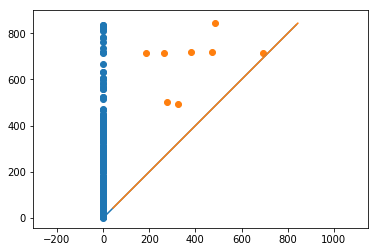

In [20]:
dio.plot.plot_diagram(dgms[0]);
dio.plot.plot_diagram(dgms[1]);

# Exercises

## how to develop node-based value filtration?
For example, based on:  
- betweenness?
- closeness centrality?
- k-core filtration?
- another node meta-data?

## what about a neighbourhood-based filtration? 
- commute time?
- shortest path? 
